<a href="https://colab.research.google.com/github/Manu8271/honeypot/blob/main/capston_honeypot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import files
uploaded = files.upload()

Saving AWS_Honeypot.csv to AWS_Honeypot (1).csv


In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded["AWS_Honeypot (1).csv"]))
print(df)

            datetime               host         src proto  type      spt  \
0       3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0   
1       3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0   
2       3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0   
3       3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0   
4       3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0   
...              ...                ...         ...   ...   ...      ...   
451576   9/8/13 5:54     groucho-oregon  1922977453   TCP   NaN  62175.0   
451577   9/8/13 5:50         groucho-eu  1017974360   TCP   NaN   6000.0   
451578   9/8/13 5:55     groucho-oregon  3234358955   TCP   NaN   6000.0   
451579   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   
451580   9/8/13 5:55      groucho-tokyo    28142724   TCP   NaN   3555.0   

           dpt           srcstr  cc        country         locale localeabbr  \
0      

In [69]:
df.head()

datetime               host         src proto  type      spt     dpt  \
0  3/3/13 21:53     groucho-oregon  1032051418   TCP   NaN   6000.0  1433.0   
1  3/3/13 21:57     groucho-oregon  1347834426   UDP   NaN   5270.0  5060.0   
2  3/3/13 21:58     groucho-oregon  2947856490   TCP   NaN   2489.0  1080.0   
3  3/3/13 21:58    groucho-us-east   841842716   UDP   NaN  43235.0  1900.0   
4  3/3/13 21:58  groucho-singapore  3587648279   TCP   NaN  56577.0    80.0   

            srcstr  cc        country         locale localeabbr postalcode  \
0   61.131.218.218  CN          China  Jiangxi Sheng         36        NaN   
1      80.86.82.58  DE        Germany            NaN        NaN        NaN   
2  175.180.184.106  TW         Taiwan         Taipei        NaN        NaN   
3     50.45.128.28  US  United States         Oregon         OR      97124   
4    213.215.43.23  FR         France            NaN        NaN        NaN   

   latitude  longitude  Unnamed: 15  
0   28.5500   115.9333          NaN  
1   51.0000     9.0000          NaN  
2   25.0392   121.5250          NaN  
3   45.5848  -122.9117          NaN  
4   48.8600     2.3500          NaN

In [70]:
month_list = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
attack_date = {"year": [], "month": [], "day": [], "time": [], "hour": []}

for d_date in df['datetime']:
    d_date = d_date.split('/')
    mon = d_date[0]
    day = d_date[1]

    year_time = d_date[2].split(' ')
    year = year_time[0]
    time = year_time[1]

    attack_date["year"].append(year)
    attack_date["month"].append(month_list[int(mon) + 1])
    attack_date["day"].append(day)
    attack_date["time"].append(time)
    attack_date["hour"].append(f"{time.split(':')[0]}h")

df["year"] = attack_date["year"]
df["month"] = attack_date["month"]
df["day"] = attack_date["day"]
df["time"] = attack_date["time"]
df["hour"] = attack_date["hour"]

df = df.drop('type', axis=1)
df = df.drop('Unnamed: 15', axis=1)
df.head()

datetime               host         src proto      spt     dpt  \
0  3/3/13 21:53     groucho-oregon  1032051418   TCP   6000.0  1433.0   
1  3/3/13 21:57     groucho-oregon  1347834426   UDP   5270.0  5060.0   
2  3/3/13 21:58     groucho-oregon  2947856490   TCP   2489.0  1080.0   
3  3/3/13 21:58    groucho-us-east   841842716   UDP  43235.0  1900.0   
4  3/3/13 21:58  groucho-singapore  3587648279   TCP  56577.0    80.0   

            srcstr  cc        country         locale localeabbr postalcode  \
0   61.131.218.218  CN          China  Jiangxi Sheng         36        NaN   
1      80.86.82.58  DE        Germany            NaN        NaN        NaN   
2  175.180.184.106  TW         Taiwan         Taipei        NaN        NaN   
3     50.45.128.28  US  United States         Oregon         OR      97124   
4    213.215.43.23  FR         France            NaN        NaN        NaN   

   latitude  longitude year month day   time hour  
0   28.5500   115.9333   13   May   3  21:53  21h  
1   51.0000     9.0000   13   May   3  21:57  21h  
2   25.0392   121.5250   13   May   3  21:58  21h  
3   45.5848  -122.9117   13   May   3  21:58  21h  
4   48.8600     2.3500   13   May   3  21:58  21h

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    451581 non-null  object 
 1   host        451581 non-null  object 
 2   src         451581 non-null  int64  
 3   proto       451581 non-null  object 
 4   spt         406770 non-null  float64
 5   dpt         406770 non-null  float64
 6   srcstr      451581 non-null  object 
 7   cc          447985 non-null  object 
 8   country     447947 non-null  object 
 9   locale      342112 non-null  object 
 10  localeabbr  331705 non-null  object 
 11  postalcode  86478 non-null   object 
 12  latitude    448112 non-null  float64
 13  longitude   448153 non-null  float64
 14  year        451581 non-null  object 
 15  month       451581 non-null  object 
 16  day         451581 non-null  object 
 17  time        451581 non-null  object 
 18  hour        451581 non-null  object 
dtypes:

In [72]:
def bar_plot_data(df: dict, field: str, subtitle: str, figsize=(5,4), top_filter=15):
  fig, ax1 = plt.subplots(figsize=figsize, dpi=100)

  for spline in ['top', 'right', 'left']:
    ax1.spines[spline].set_visible(False)

  df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
  if top_filter:
    df_filter = df_filter.head(top_filter)
  sns.barplot(data=df_filter, palette='cool', x='counts', y=field)
  ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
  ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
  ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')

  plt.plot(color='white',lw=3)
  fig.suptitle(subtitle, fontsize=18)
  plt.show()


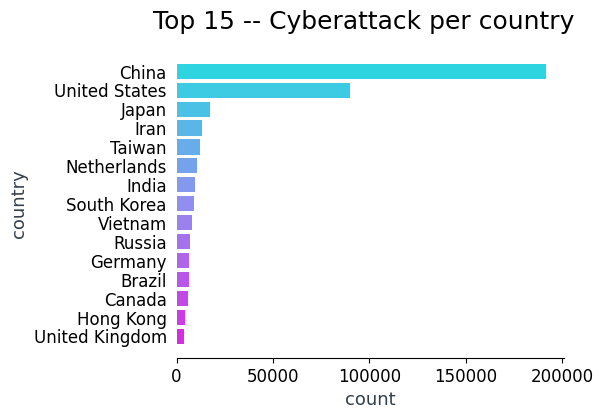

In [73]:
bar_plot_data(df, 'country', 'Top 15 -- Cyberattack per country')


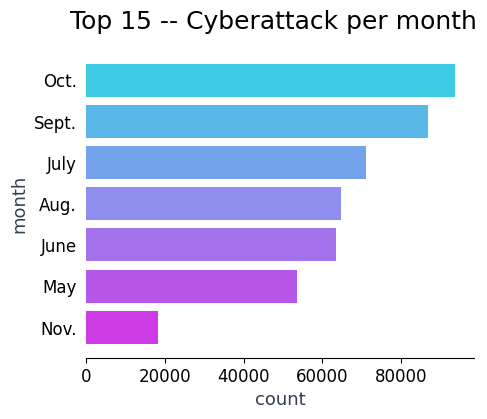

In [74]:
bar_plot_data(df, 'month', 'Top 15 -- Cyberattack per month')

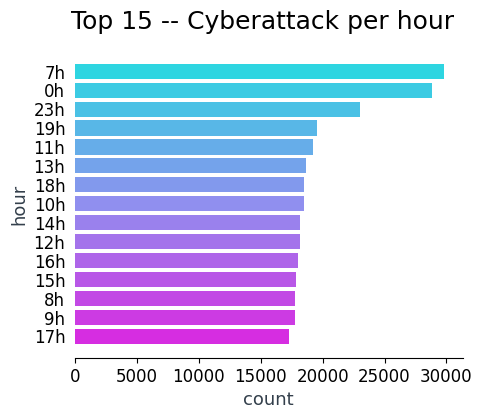

In [75]:
bar_plot_data(df, 'hour', 'Top 15 -- Cyberattack per hour')

TPC == green
UDP == red
ICMP == orange


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


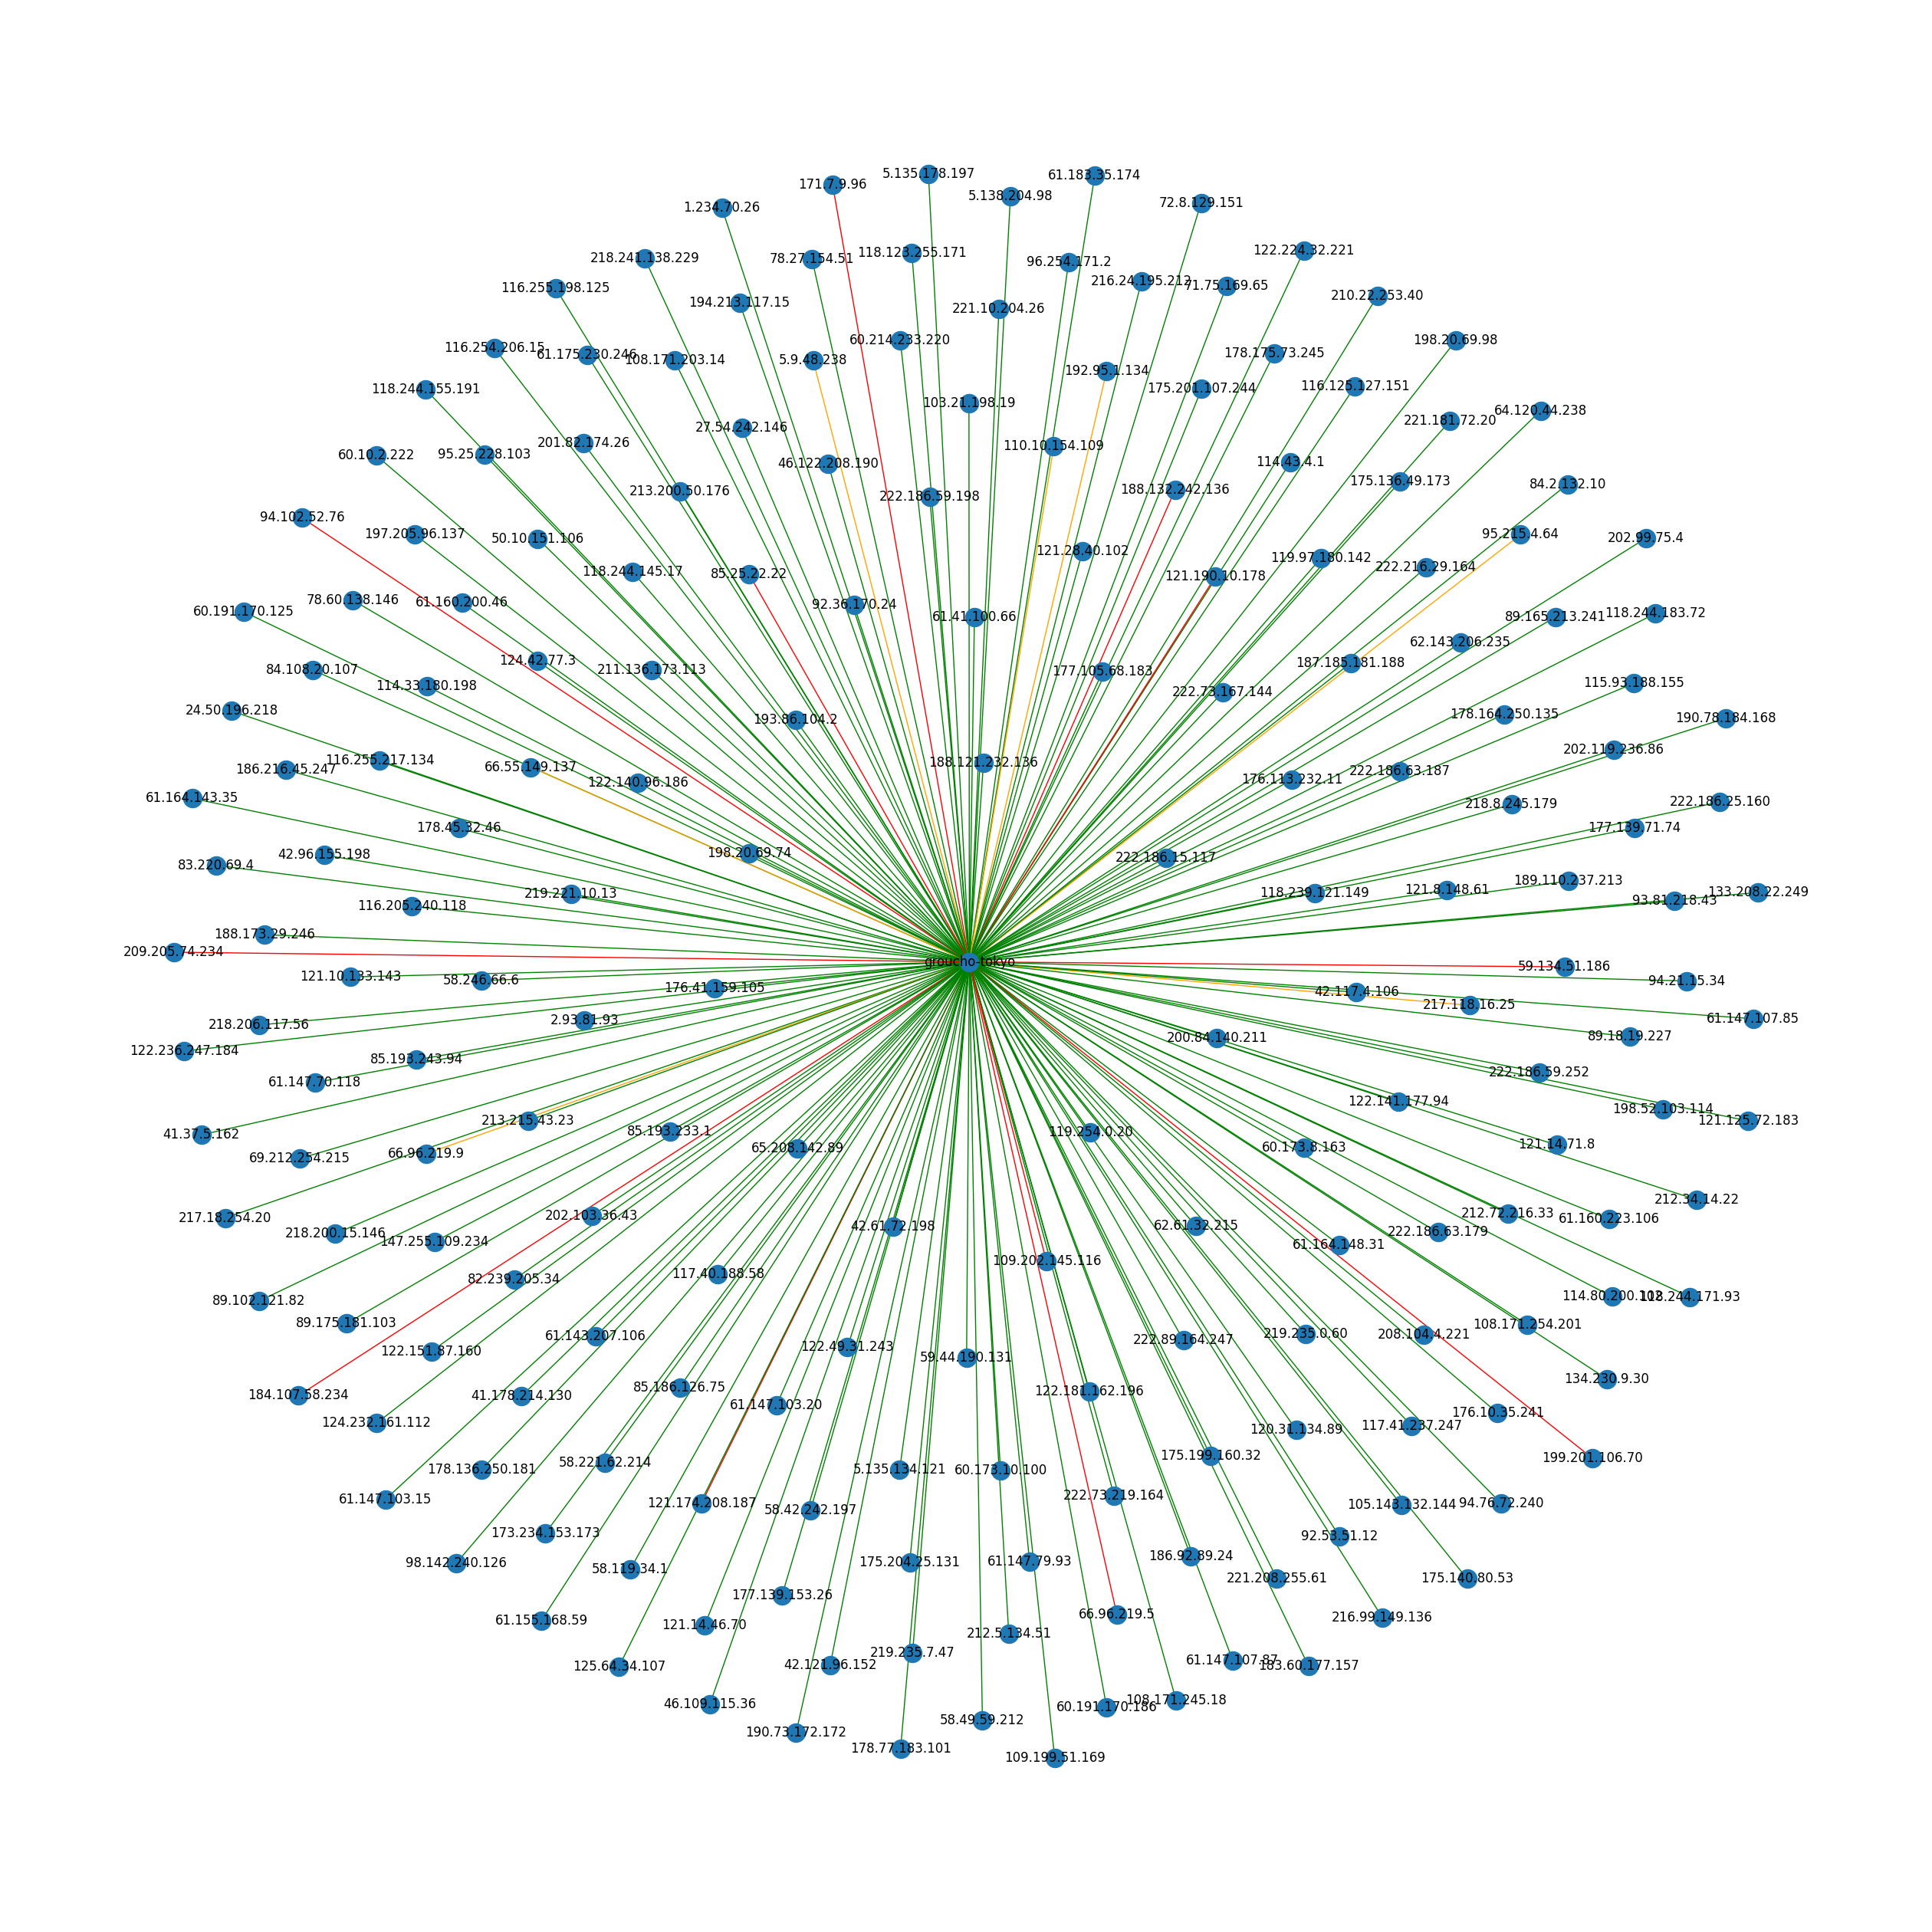

In [76]:
import networkx as nx
df_filter1 = df[(df.host == "groucho-tokyo") & (df.month == "May") & (df.hour == "20h")]

G = nx.Graph()
G.add_node('groucho-tokyo', color='red')

ip_listx = []
edge_color = []
for ip, proto in zip(df_filter1['srcstr'], df_filter1['proto']):
    if ip not in ip_listx:
        if 'TCP' == proto:
            edge_color.append('green')
        if 'UDP' == proto:
            edge_color.append('red')
        if 'ICMP' == proto:
            edge_color.append('orange')
        G.add_node(ip)
        ip_listx.append(ip)

for ip in ip_listx:
    G.add_edge('groucho-tokyo', ip)
fig = plt.figure(1, figsize=(25, 25), dpi=100)
print('TPC == green\nUDP == red\nICMP == orange')
nx.draw(G, with_labels=True, font_weight='normal', edge_color=edge_color, arrowsize=30, arrowstyle='fancy')


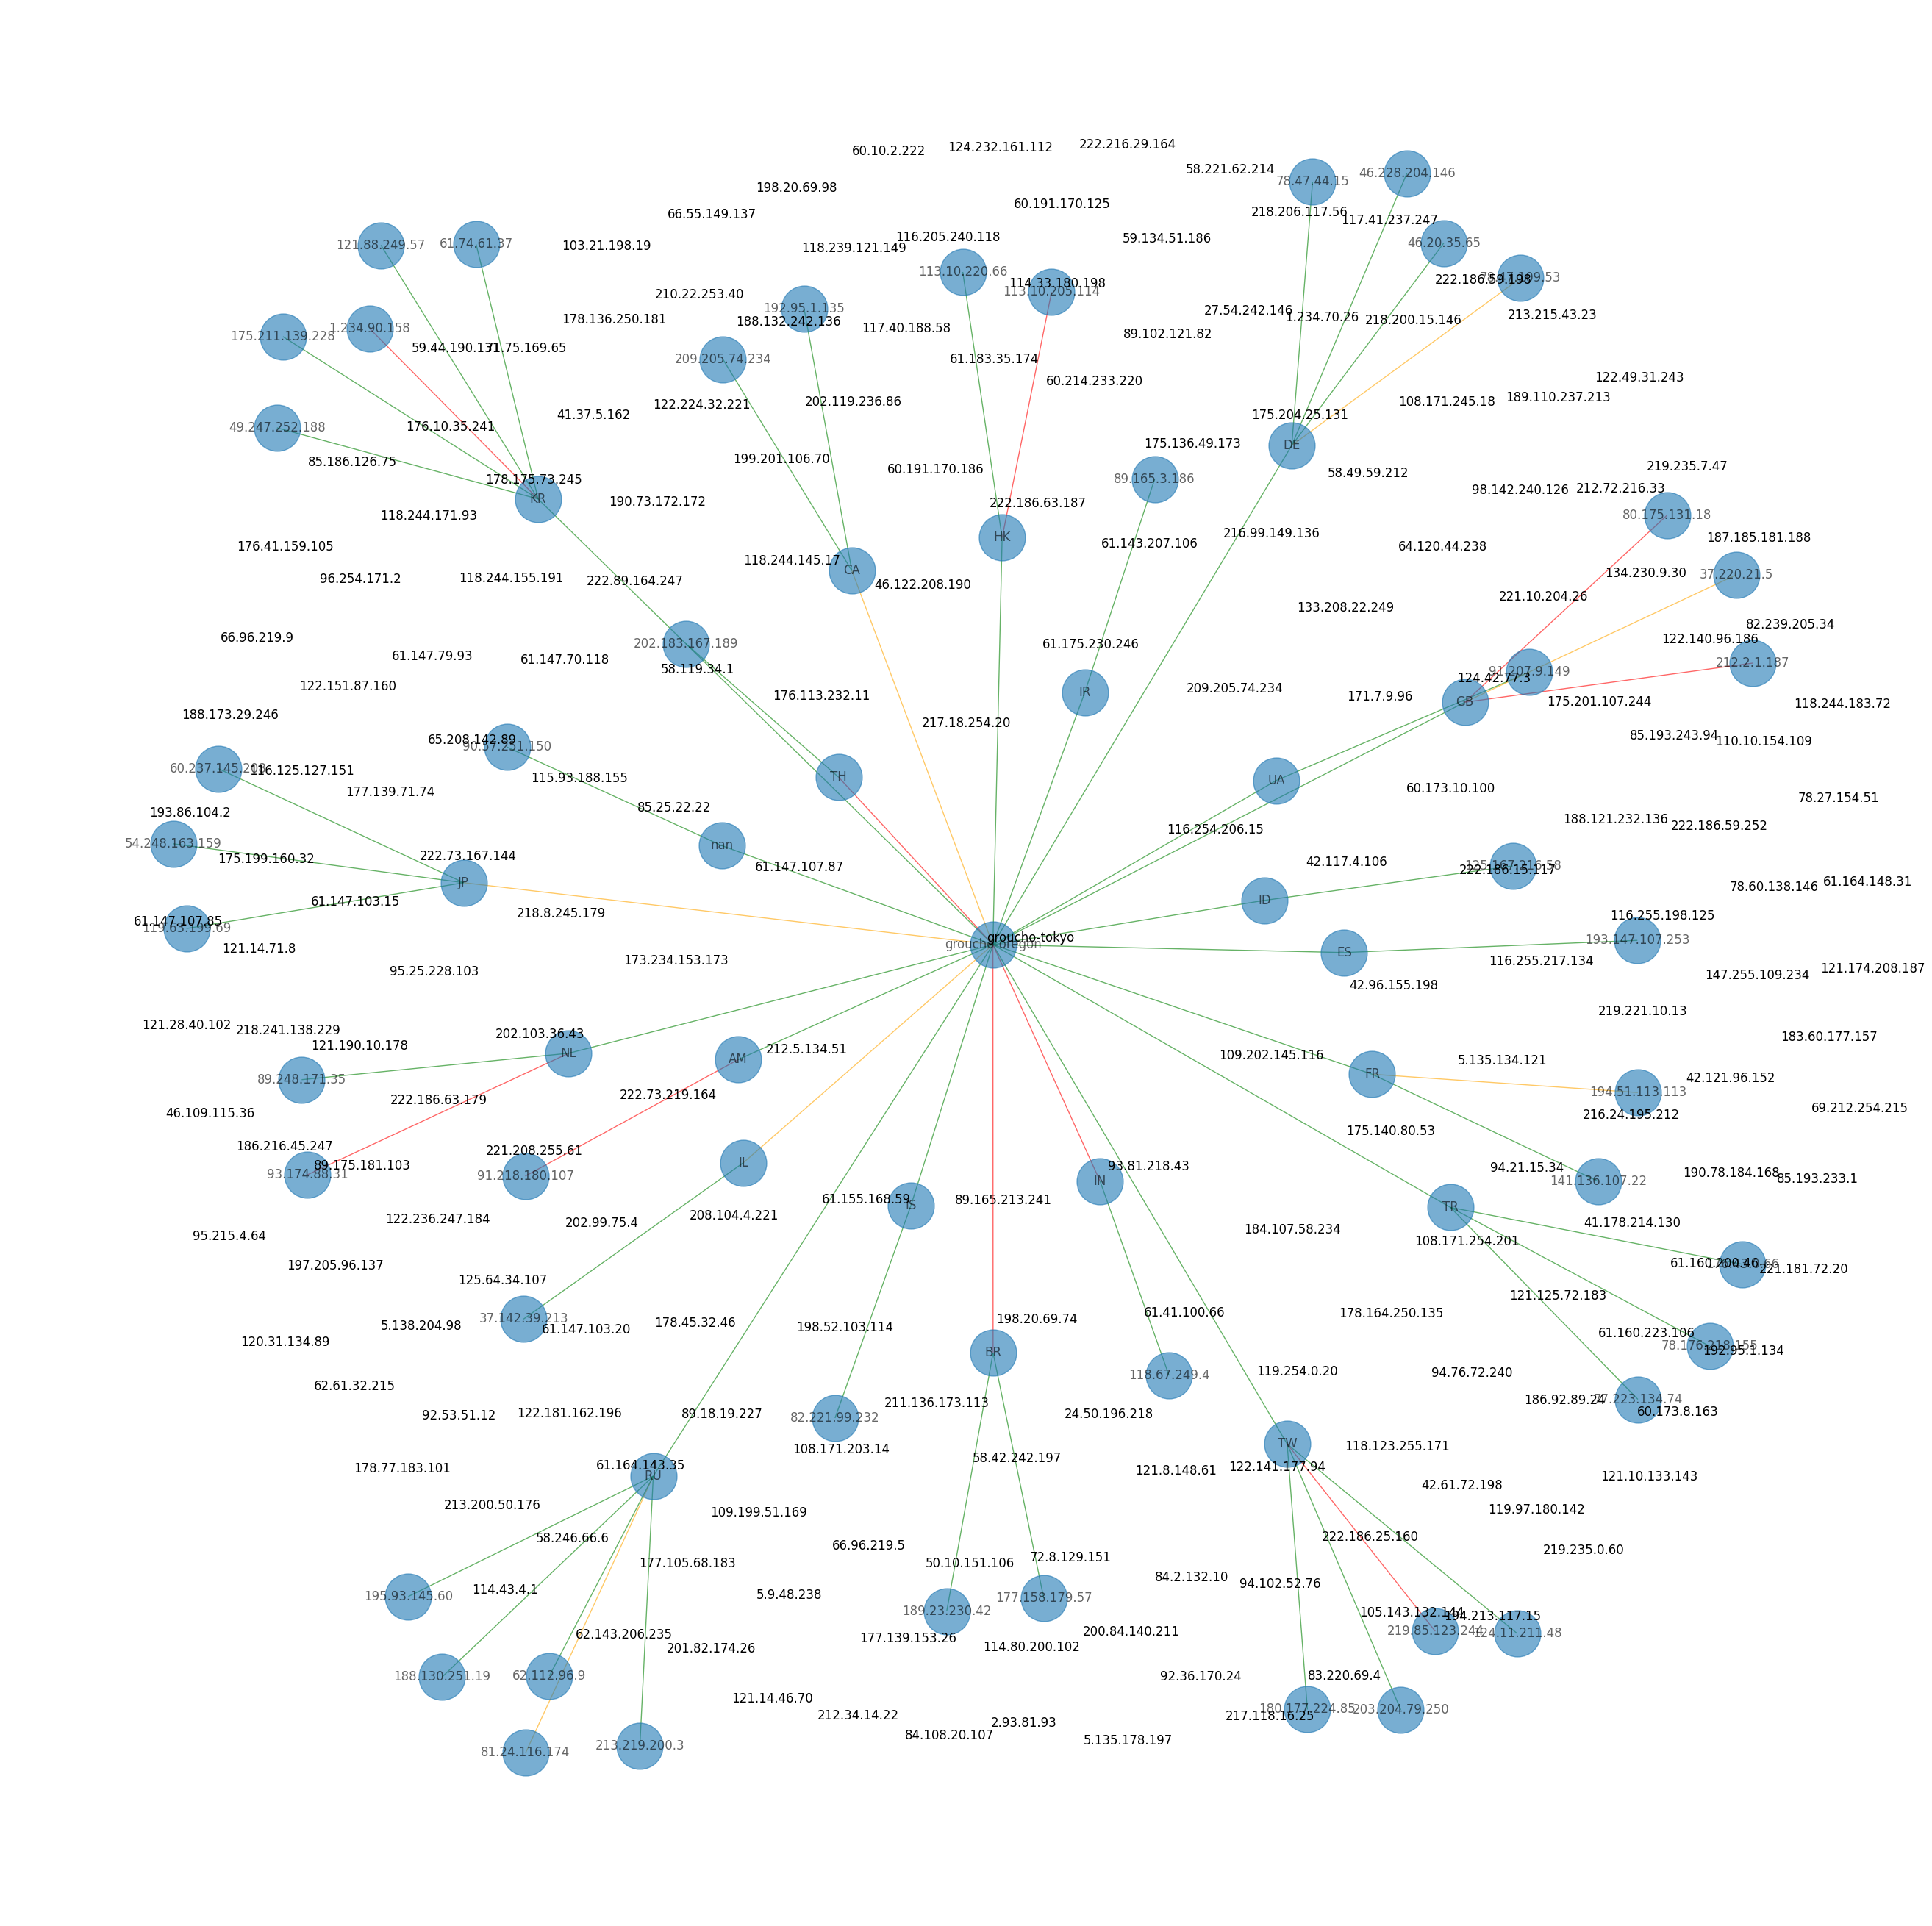

In [77]:
df_filter = df[(df.host == "groucho-oregon") & (df.month == "May") & (df.hour == "20h")]

from matplotlib.pyplot import figure, text

Gx = nx.Graph()
Gx.add_node('groucho-oregon')

country_list = []
ip_list = []
edge_color = []
for country, ip, proto in zip(df_filter['cc'], df_filter['srcstr'], df_filter['proto']):
    if country != 'CN' and country != 'US':
        if country not in country_list:
            Gx.add_node(country)
            country_list.append(country)

        if ip not in ip_list:
            if 'TCP' == proto:
                edge_color.append('green')
            if 'UDP' == proto:
                edge_color.append('red')
            if 'ICMP' == proto:
                edge_color.append('orange')

            Gx.add_node(ip)
            Gx.add_edge(country, ip)
            ip_list.append(ip)


for country in country_list:
    Gx.add_edge('groucho-oregon', country)

options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}


pos = nx.spring_layout(G)
d = dict(G.degree)
fig = plt.figure(figsize=(26, 26), dpi=100)
nx.draw(Gx, alpha=0.6, node_size=2050, with_labels=True, font_weight='normal',
        edge_color=edge_color, arrowsize=30, arrowstyle='fancy')

for node, (x, y) in pos.items():
    text(x, y, node, fontsize=12)

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

d=df
d = d.drop('datetime', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

d.host = le.fit_transform(d.host)
d.proto = le.fit_transform(d.proto)
d.cc = le.fit_transform(d.cc)
d.country = le.fit_transform(d.country)
d.locale = le.fit_transform(d.locale)
d.month = le.fit_transform(d.month)

d = d.drop('srcstr',axis=1)
d = d.drop('localeabbr',axis=1)
d = d.drop('time',axis=1)
d = d.drop('postalcode',axis=1)
X = d
X = X.dropna()
X.head()

host         src  proto      spt     dpt   cc  country  locale  latitude  \
0     2  1032051418      1   6000.0  1433.0   34       36     390   28.5500   
1     2  1347834426      2   5270.0  5060.0   41       57    1179   51.0000   
2     2  2947856490      1   2489.0  1080.0  159      157    1020   25.0392   
3     7   841842716      2  43235.0  1900.0  163      169     681   45.5848   
4     4  3587648279      1  56577.0    80.0   54       54    1179   48.8600   

   longitude year  month day hour  
0   115.9333   13      3   3  21h  
1     9.0000   13      3   3  21h  
2   121.5250   13      3   3  21h  
3  -122.9117   13      3   3  21h  
4     2.3500   13      3   3  21h

In [79]:
X.isnull().sum()

host         0
src          0
proto        0
spt          0
dpt          0
cc           0
country      0
locale       0
latitude     0
longitude    0
year         0
month        0
day          0
hour         0
dtype: int64

In [80]:
import matplotlib.pyplot as plt

In [81]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


ValueError: ignored